
# Task - 3 EDA: GLOBAL TERRORISM REPORT
#### Author:  Shubhang Shukla

## Introduction

### 1. The Global Terrorism Database
- The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. 
- The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. 
- The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

### 2. Characteristics of the Database
- Contains information on over 180,000 terrorist attacks
- Currently the most comprehensive unclassified database on terrorist attacks in the world
- Includes information on more than 88,000 bombings, 19,000 assassinations, and 11,000 kidnappings since 1970
- Includes information on at least 45 variables for each case, with more recent incidents including information on more than 120 variables
- More than 4,000,000 news articles and 25,000 news sources were reviewed to collect incident data from 1998 to 2017 alone.

### 3. Scope of Analysis
- The Data is filled with null values, outliers and errors, hence an extensive data cleaning has been performed 
- There are way too many columns in the dataset and only few are relevant for analysis.
- Data Visualization has been performed on various features to show correlation between them and understand the variation.
- Statistical Analysis has also been performed in order to get a brief of the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding = 'ISO-8859-1', low_memory = False)
df.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [3]:
df.shape

(181691, 135)

In [4]:
# type(df.columns)
columns_list = list(df.columns)
print(columns_list)
# df.columns.values.tolist()

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [5]:
df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

## Data Cleaning
### Removing Columns with excessive Null values

In [6]:
#print(df.isnull().sum())
#print(df.shape)
# created a DataFrame comprising of null vales because of the large number of columns
df_null = pd.DataFrame(df.isnull().sum())
df_null.reset_index()

,index,0
0,eventid,0
1,iyear,0
2,imonth,0
3,iday,0
4,approxdate,172452
...,...,...
130,INT_LOG,0
131,INT_IDEO,0
132,INT_MISC,0
133,INT_ANY,0


In [7]:
df_null = pd.DataFrame(df.isnull().sum())
df_null = df_null.reset_index()
df_null.rename(columns = {'index': 'column_name', 0: 'Null_vals'}, inplace = True)
df_null.head()

,column_name,Null_vals
0,eventid,0
1,iyear,0
2,imonth,0
3,iday,0
4,approxdate,172452


In [8]:
#df_null.tail(10)

In [9]:
df.isnull().sum().sum()

13853997

In [10]:
# Let us check how many columns have total number of null values in them
df_null[df_null['Null_vals'] > 0].head()

,column_name,Null_vals
4,approxdate,172452
6,resolution,179471
11,provstate,421
12,city,434
13,latitude,4556


In [11]:
# Checking for extreme null columns which have almost 99% null vales in them
#df_null[df_null['Null_vals'] > 181000]

Clearly a large number of columns (106 / 135) have Null values in them. Out of 135 columns atleast 106 have gretaer than or equal to 1 Null values in them. We can also see that many columns possess null values as high as 99 % of the data and in many columns null value is almost greater than 50% of the data. These columns can be easily dropped without another thought.
To remove so many columns at once we will use a for loop and iterate through each columns matching our criteria and then we will drop them.

In [12]:
df.shape

(181691, 135)

In [13]:
df_null.dtypes

column_name    object
Null_vals       int64
dtype: object

In [14]:
# I have written a loop to remove many columns at once.
# outer for loop will iterate through all the columns in initial dataframe one by one.

df1 = df
for column in df.columns: # df1.columns returns a list of all the columns
    #print(column)
    for i in df_null[df_null['Null_vals'] > 100000].column_name.values.tolist():
        
        if i == column:
            #print(i)
            df1.drop(columns = i, inplace = True)

print(df1.shape)

(181691, 58)


In [15]:
df1.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [16]:
df_notnull = pd.DataFrame(df1.notnull().sum())
df_notnull = df_notnull.reset_index()
df_notnull.rename(columns = {'index': 'Column_name', 0: 'non_null_vals'}).head()

,Column_name,non_null_vals
0,eventid,181691
1,iyear,181691
2,imonth,181691
3,iday,181691
4,extended,181691


In [17]:
df1.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

###  Making a Final DataFrame With Only Relevant Columns for Analysis. We will keep 20 out of the 58 columns and Rename them for Better Understanding

In [18]:
df1.rename(columns={'eventid':'Eventid', 'iyear':'Year', 'imonth':'Month', 'iday':'Day', 
                          'extended':'Extended', 'resolution':'Resolution',  'attacktype1_txt':'Attacktype', 
                          'country_txt':'Country', 'region_txt':'Region', 'provstate': 'Provstate', 
                          'city':'City', 'crit1':'Crit1', 'crit2':'Crit2', 
                          'crit3':'Crit3', 'multiple':'Multiple', 'success':'Success', 'suicide':'Suicide', 
                          'targtype1_txt':'Targetype', 'natlty1_txt':'Natlty1', 'natlty2_txt':'Natlty2', 
                          'natlty3_txt':'Natlty3', 'gname':'Gname', 'gname2':'Gname2', 'gname3':'Gname3', 
                          'guncertain1':'Guncertain1', 'guncertain2':'Guncertain2', 'guncertain3':'Guncertain3', 
                          'claimed':'Claimed', 'weaptype1_txt':'Weapontype', 'weapsubtype1_txt':'Weapsubtype', 
                          'nkill':'Nkill', 'nkillus':'Nkillus', 'nkillter':'Nkillter', 'nwound':'Nwound', 
                          'nwoundus':'Nwoundus', 'nwoundte':'Nwoundter', 'property':'Property', 
                          'propextent_txt':'Propextent', 'propvalue':'Propvalue', 'ishostkid':'Ishostkid', 
                          'nhostkid':'Nhostkid', 'nhostkidus':'Nhostkidus', 'ransom':'Ransom', 
                          'hostkidoutcome':'Hostkidoutcome', 'nreleased':'Nreleased'},inplace=True)
#df1

In [19]:
# Get the chosen dataframe with the required columns
df3 = df1[['Eventid', 'Year','Country', 'Region', 'Provstate', 'City', 'Crit1', 'Crit2', 'Crit3', 
                  'Success', 'Suicide', 'Attacktype', 'Targetype', 'Natlty1','Gname', 'Guncertain1', 
                  'Claimed', 'Weapontype', 'Nkill','Nwound']]
df3['Casualties'] = df3['Nkill']+df3['Nwound']
df3.head(5)

<ipython-input-19-b85a7c18d0b9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Casualties'] = df3['Nkill']+df3['Nwound']


,Eventid,Year,Country,Region,Provstate,City,Crit1,Crit2,Crit3,Success,...,Attacktype,Targetype,Natlty1,Gname,Guncertain1,Claimed,Weapontype,Nkill,Nwound,Casualties
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,1,1,1,...,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,0.0,NaN,Unknown,1.0,0.0,1.0
1,197000000002,1970,Mexico,North America,Federal,Mexico city,1,1,1,1,...,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,0.0,NaN,Unknown,0.0,0.0,0.0
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,1,1,1,1,...,Assassination,Journalists & Media,United States,Unknown,0.0,NaN,Unknown,1.0,0.0,1.0
3,197001000002,1970,Greece,Western Europe,Attica,Athens,1,1,1,1,...,Bombing/Explosion,Government (Diplomatic),United States,Unknown,0.0,NaN,Explosives,NaN,NaN,NaN
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,1,1,1,1,...,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,0.0,NaN,Incendiary,NaN,NaN,NaN


### Correlation and Heatmap

In [168]:
df3.corr()

,Eventid,Year,Crit1,Crit2,Crit3,Success,Suicide,Guncertain1,Claimed,Nkill,Nwound,Casualties
Eventid,1.000000,0.999996,0.002019,0.026215,-0.016789,-0.082972,0.137743,0.040647,0.141600,0.015351,0.015282,0.013944
Year,0.999996,1.000000,0.001995,0.026211,-0.016784,-0.082963,0.137736,0.040656,0.141486,0.015341,0.015273,0.013934
Crit1,0.002019,0.001995,1.000000,-0.008984,-0.040589,-0.010733,0.019039,0.013568,0.006403,0.010834,0.006790,0.008245
Crit2,0.026215,0.026211,-0.008984,1.000000,-0.031425,-0.013476,0.002770,-0.003619,0.005675,-0.019506,-0.002209,-0.007230
Crit3,-0.016789,-0.016784,-0.040589,-0.031425,1.000000,-0.013678,-0.026620,0.057764,-0.047356,-0.056952,0.007281,-0.006627
Success,-0.082972,-0.082963,-0.010733,-0.013476,-0.013678,1.000000,-0.031155,0.024725,-0.005985,0.053115,0.025804,0.035385
Suicide,0.137743,0.137736,0.019039,0.002770,-0.026620,-0.031155,1.000000,-0.000819,0.035791,0.136086,0.099525,0.120752
Guncertain1,0.040647,0.040656,0.013568,-0.003619,0.057764,0.024725,-0.000819,1.000000,-0.042083,0.004043,0.008971,0.008915
Claimed,0.141600,0.141486,0.006403,0.005675,-0.047356,-0.005985,0.035791,-0.042083,1.000000,0.014038,0.004992,0.007788
Nkill,0.015351,0.015341,0.010834,-0.019506,-0.056952,0.053115,0.136086,0.004043,0.014038,1.000000,0.534375,0.690476


<AxesSubplot:>

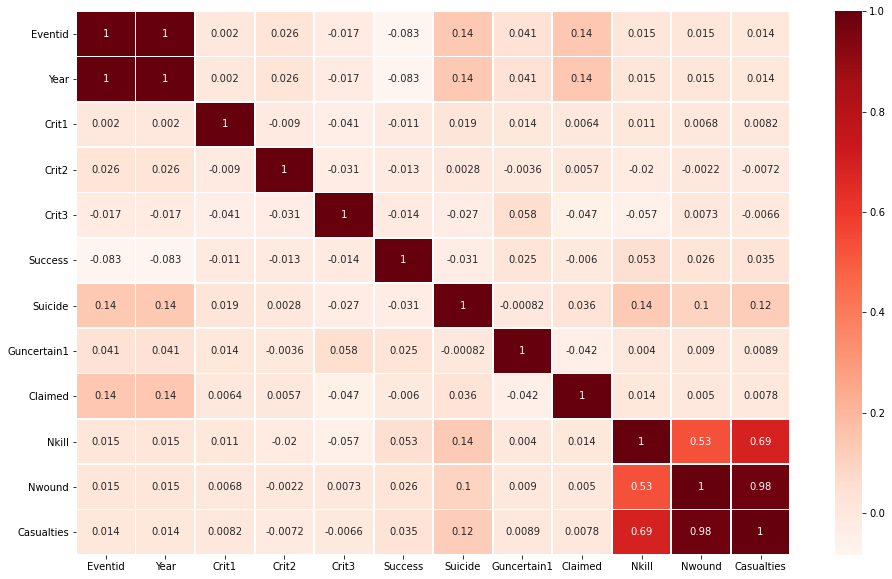

In [179]:
fig, ax = plt.subplots(figsize = (16,10))
sns.heatmap(df3.corr(), annot = True, cmap = 'Reds', ax = ax, linewidth = 0.8)


## Data Visualization

### Highlights of the Database

In [20]:
print('Country with the highest number of Terrorist Attacks:',df3['Country'].value_counts().index[0])
print('Regions with the highest number of  Terrorist Attacks:',df3['Region'].value_counts().index[0])
print('Maximum number of people were killed by a single terrorist attack are',df3['Nkill'].max(),'people that took place in',df3.loc[df3['Nkill'].idxmax()].Country)

Country with the highest number of Terrorist Attacks: Iraq
Regions with the highest number of  Terrorist Attacks: Middle East & North Africa
Maximum number of people were killed by a single terrorist attack are 1570.0 people that took place in Iraq


### Top 20 Countries Affected by Terrorism

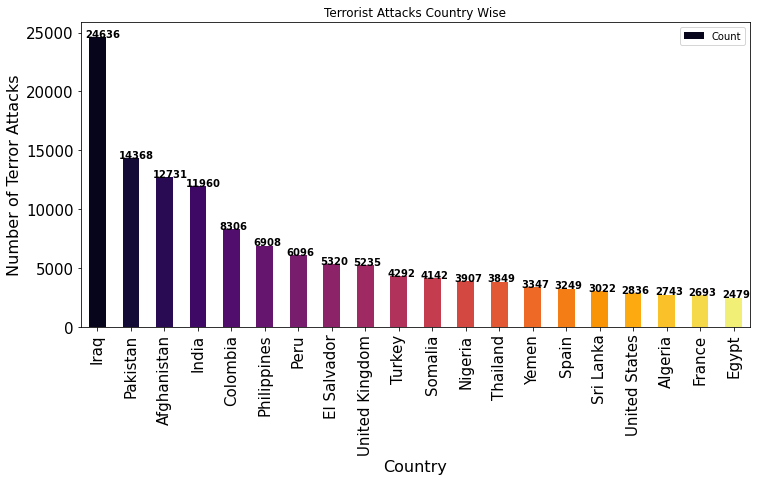

In [21]:
df3_count = pd.DataFrame(df3.Country.value_counts())
df3_count.reset_index(inplace = True)

df3_count.rename(columns = {'index': 'Country', 'Country': 'Count'}, inplace = True)
#df3_count.iloc[:20]
df3_count.iloc[:20].plot(x = 'Country', y = 'Count', kind = 'bar', figsize = (12,5.6), 
                         title = 'Terrorist Attacks Country Wise', fontsize = (15), color = sns.color_palette('inferno', 20))
# make a list to store the values of y axis which we will print later
count_list = df3_count.Count.values.tolist()
count_list_short = count_list[:20]

ax = plt.gca()
plt.xlabel('Country', size = 16)
plt.ylabel('Number of Terror Attacks', size = 16)

# code for getting the values of bar plot on the bar
for i, j in enumerate(count_list_short):
    ax.text(i-0.35, j, str(j), color='k',fontweight='bold')

### Kill to Attack Ratio

Text(0, 0.5, 'Count')

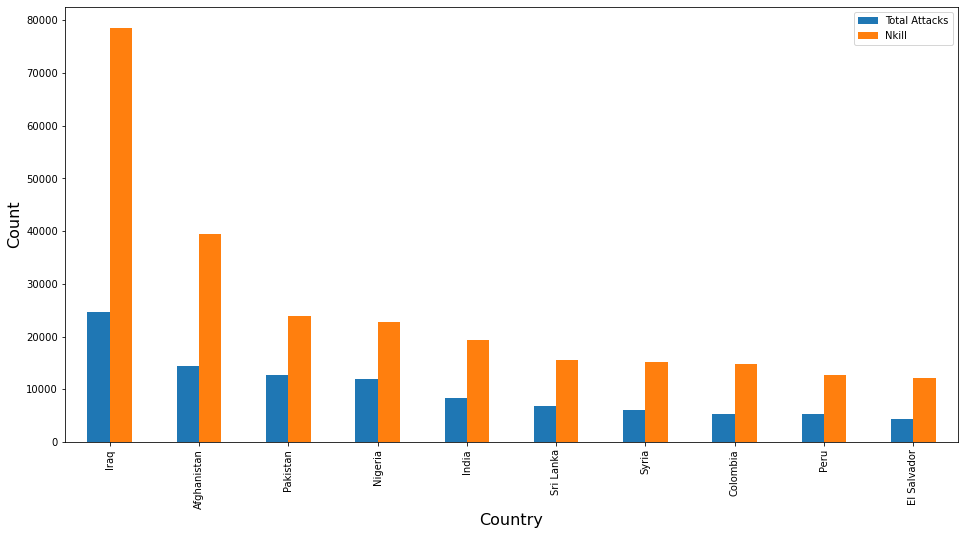

In [22]:
table3 = df3.groupby('Country')['Nkill'].sum().to_frame()
table3.sort_values(by= 'Nkill', ascending = False, inplace = True)

table3.reset_index(inplace = True)
list_total_attacks = df3.Country.value_counts().values.tolist()
table3.insert(1, "Total Attacks",  list_total_attacks, True)
list_country_names = table3.Country.values.tolist()

#table3
table3.iloc[:10].plot(kind = 'bar', figsize = (16,8))
plt.xticks([0,1,2,3,4,5,6,7,8,9], list_country_names[:10])
plt.xlabel('Country', size = 16)
plt.ylabel('Count', size = 16)

### Top 20 Cities Affected by Terrorism

Text(0, 0.5, 'Number of Terror Attacks')

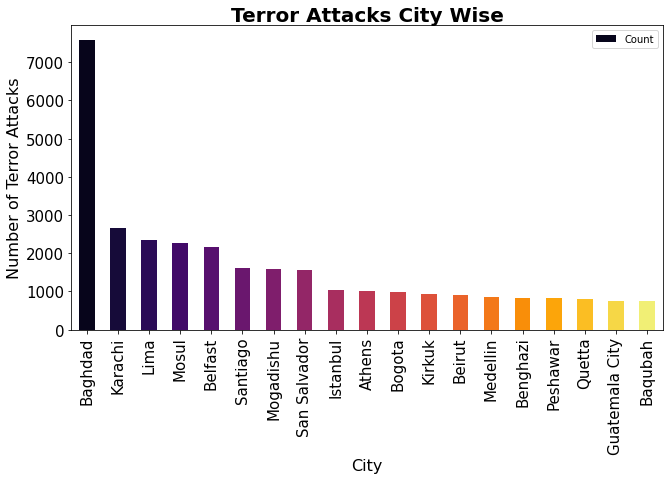

In [23]:
# create a data frame using value counts
df3_count = pd.DataFrame(df3.City.value_counts())
df3_count.reset_index(inplace = True) # reset the index
df3_count.rename(columns = {'index': 'City', 'City': 'Count'}, inplace = True) # rename the new index
#df3_count.iloc[:20]
# use df.plot to plot the graph 
df3_count.iloc[1:20].plot(x = 'City', y = 'Count', kind = 'bar', figsize = (10.6,5.6), fontsize = (15),
                          color = sns.color_palette('inferno', 19))

plt.title('Terror Attacks City Wise', fontsize= 20, pad= -70, weight ='bold')
plt.xlabel('City', size = 16)
plt.ylabel('Number of Terror Attacks', size = 16)

### Terror Attacks Region Wise

Text(0, 0.5, 'Number of Terrorist Attacks')

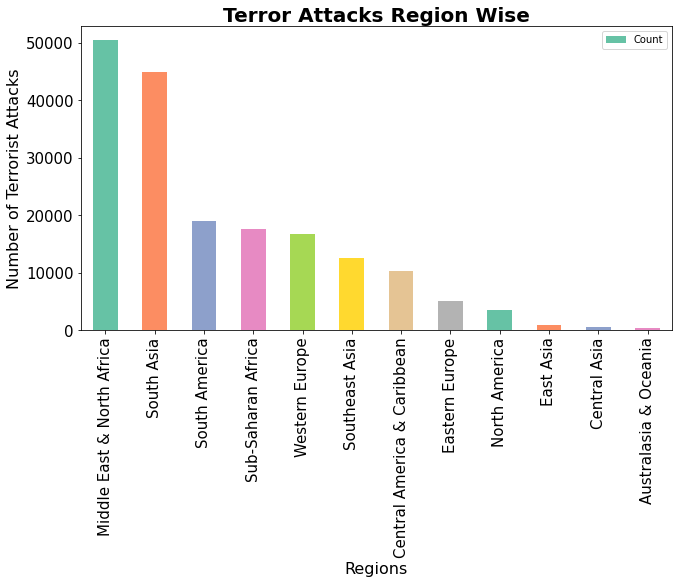

In [24]:
df3_region = pd.DataFrame(df3['Region'].value_counts())
df3_region.reset_index(inplace = True)
df3_region.rename(columns = {'index': 'Region', 'Region': 'Count'},inplace = True)
df3_region.plot(x = 'Region', y = 'Count', kind = 'bar', figsize = (10.6,5.6), 
                fontsize = (15), color = sns.color_palette('Set2', 12))
plt.title('Terror Attacks Region Wise', fontsize= 20, pad= -70, weight ='bold')
plt.xlabel('Regions', size = 16)
plt.ylabel('Number of Terrorist Attacks', size = 16)

### Growth of Terror Attacks Region Wise from 1970-2017

Text(0.5, 1.0, 'Growth of Terror Attacks Region wise from 1970-2017')

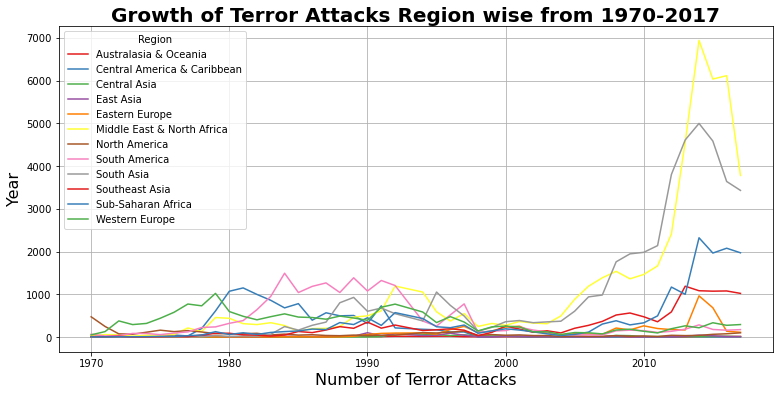

In [25]:
var_year_region = pd.crosstab(df3.Year, df3.Region)
# df.plot returns matplotlib.axis.AxesSubplot to which we can add labels along the x and y axis.
ax1 = var_year_region.plot(figsize = (12.8,6), color = sns.color_palette('Set1', 12))
ax1.set_xlabel("Number of Terror Attacks", size = 16)
ax1.set_ylabel("Year", size = 16)
ax1.grid()
# we will also add a title to the plot using plt.title()
plt.title('Growth of Terror Attacks Region wise from 1970-2017', fontsize= 20, pad= -70, weight ='bold')

### Number of Terror Attacks vs Number of Casualties (Dead+Injured) from 1970-2017 

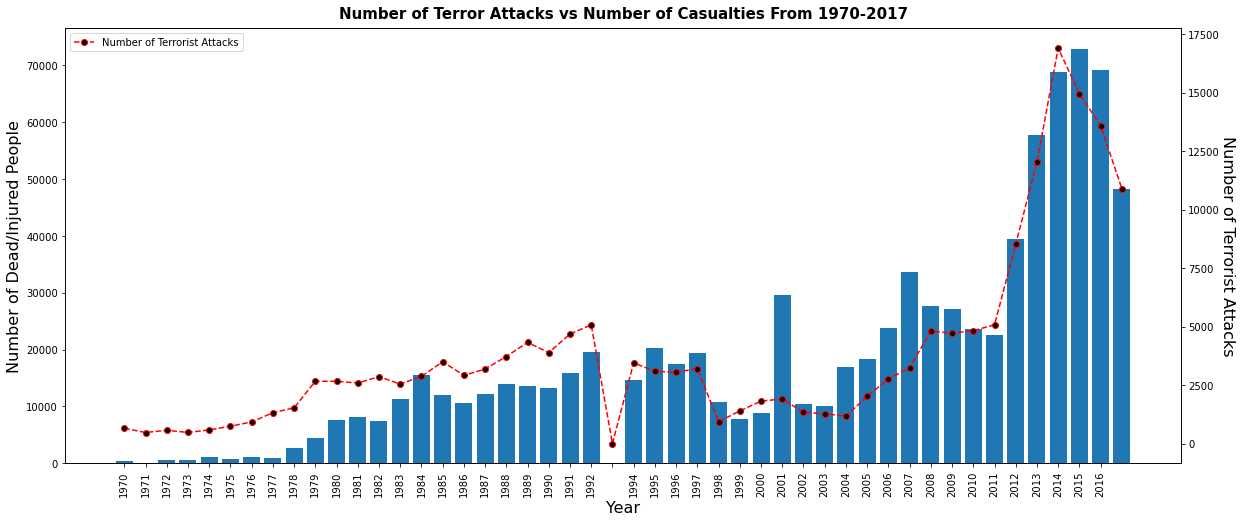

In [26]:
# group the data by year
year_cas = df3[['Year', 'Casualties']].groupby('Year').sum()
list_year = df3['Year'].unique().tolist()
#print(year_cas)
#print(list_year)
fig, ax2 = plt.subplots(figsize = (20,8))
ax2.bar(year_cas.index, [i[0] for i in year_cas.values])

ax2.set_xticks(list_year)
#ax2.set_xticklabels(np.arange(1970, 2017, step = 1), rotation = 90)
ax2.set_xticklabels(list_year, rotation = 90)

ax2.set_ylabel('Number of Dead/Injured People', size = 16)
ax2.set_xlabel('Year', size = 16)
ax2.set_title('Number of Terror Attacks vs Number of Casualties From 1970-2017', fontsize = 15, pad = 10, weight = 'bold')

ax3 = ax2.twinx()
number_attack = []
for year in list_year:
    number_attack.append(len(df3[df3["Year"] == year][["Year"]]))
number_attack.insert(23,0)

ax3.set_ylabel('Number of Terrorist Attacks', size = 16, labelpad = 15, rotation = -90)
ax3.plot(range(1970, 2018), number_attack, 'r--o', mfc = 'k', label = 'Number of Terrorist Attacks')

plt.xticks(np.arange(1970, 2017))
plt.legend(loc= 'upper left')
plt.show()

### Types of Terror Attacks

In [27]:
df_attacktype = pd.DataFrame(df3['Attacktype'].value_counts())
df_attacktype.reset_index(inplace = True)
df_attacktype.rename(columns = {'index': 'AttackType', 'Attacktype': 'Count'}, inplace = True)

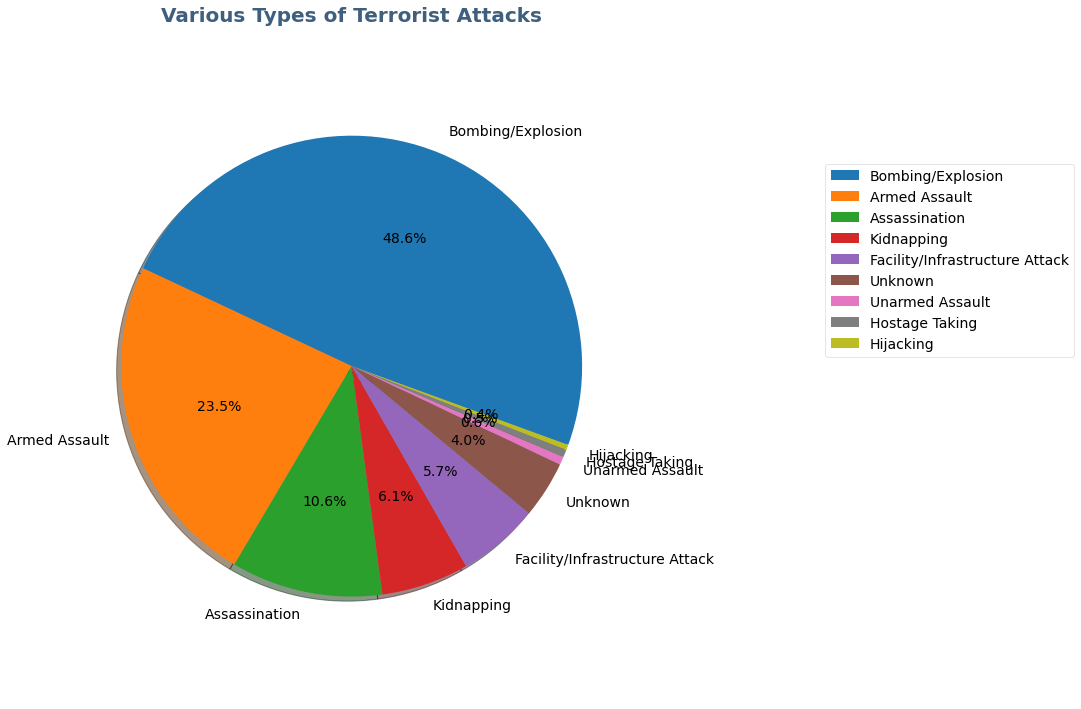

In [28]:
attack_type = df3['Attacktype'].value_counts().tolist()
#attack_type
# calculate the sum of elements in list

#piechart of Terrorist Attack Types
# create a list of the types of terror attacks
labels = ['Bombing/Explosion', 'Armed Assault', 'Assassination', 'Kidnapping', 'Facility/Infrastructure Attack', 
          'Unknown', 'Unarmed Assault', 'Hostage Taking', 'Hijacking']
# create an empty list to store values for percentage
sizes = []

for i in attack_type:
    percent = i*100/len(df3['Attacktype'])
    sizes.append(percent)

# create plots using fig and ax objects from matplotlib
fig, ax4 = plt.subplots(figsize = (10,10)) # get the figure and axes object
# use ax.pie to plot pie chart which returns 3 parameters
patches, text, autotexts = ax4.pie(sizes, labels = labels, autopct = '%1.1f%%', 
                                  startangle = -20, shadow = True, colors = sns.color_palette(),
                                 textprops = {'fontsize': 14, 'weight': 'light', 'color': 'k'})
ax4.axis('equal')

plt.title('Various Types of Terrorist Attacks', fontsize= 20, pad= -70, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) #pad change the distance from title to graph
plt.tight_layout()
ax4.legend(loc='lower right',framealpha = 0.5,bbox_to_anchor=(1.8,0.5,0.1,1), prop={'size': 14})

### Casualties Versus Types of Terror Attacks

In [29]:
#df3['Casualties'].describe()

<ipython-input-30-9ba93f384167>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(list_attack, rotation = 90)


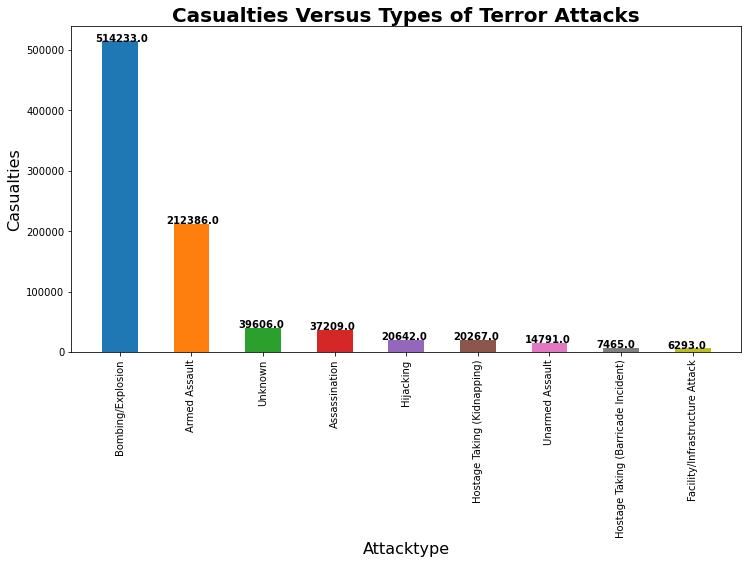

In [30]:
# Used a df3.groupby() to get the 
df3_cas = pd.DataFrame(df3.groupby('Attacktype').Casualties.sum())
df3_cas.reset_index(inplace = True)
df3_cas.sort_values('Casualties', ascending = False, inplace = True)
#df3_cas.head()

# store the values of attack type and casualties in a list
list_attack = df3_cas['Attacktype'].values.tolist()
list_cas = df3_cas['Casualties'].values.tolist()
#print(list_cas)
# to make a customized plot we use fig and ax which are returned by plt.subplots

fig, ax5 = plt.subplots(figsize = (12,6))

ax5.bar(list_attack, list_cas, color = sns.color_palette(), width = 0.5)

ax5.set_xticklabels(list_attack, rotation = 90)

# using plt functions to set title and label

plt.title('Casualties Versus Types of Terror Attacks', fontsize= 20, pad= -70, weight ='bold')
plt.xlabel('Attacktype', size = 16)
plt.ylabel('Casualties', size = 16)

#writing a for loop to show the values on the graph
#for i, j in enumerate(list_cas):
    #ax1.text(i-0.3, j-13000 if j==37209 else j+3000, str(round(j)), 
             #color='k',
             #fontweight='bold')
# enumerate returns a tuple of index-value pair
# ax.text(index, value, type)
for i, j in enumerate(list_cas):
    ax5.text(i-0.35, j, str(j), color='k',fontweight='bold')

### Type of Terror Attack vs Regions

Text(0, 0.5, 'Regions')

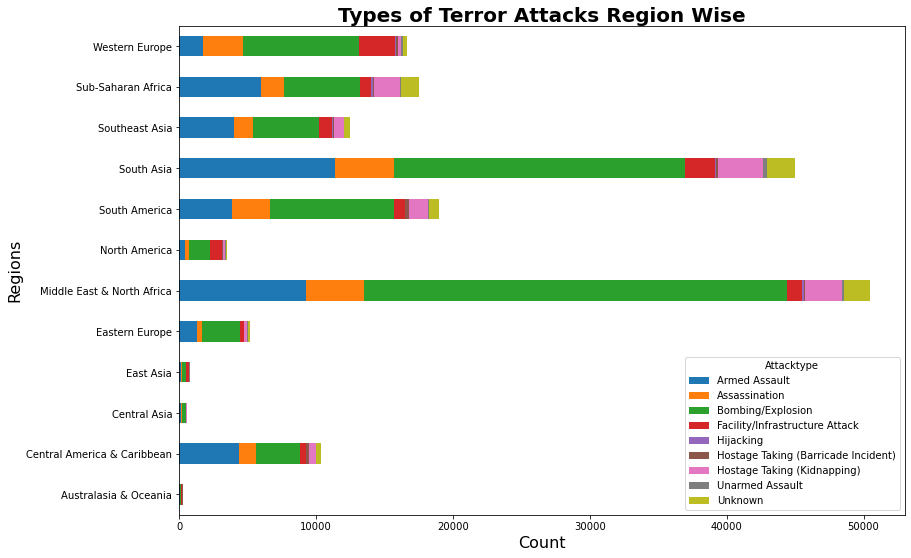

In [31]:
var_type_region = pd.crosstab(df3.Region, df3.Attacktype)
var_type_region.plot(kind = 'barh', stacked = True, color = sns.color_palette(), figsize = (13,9))
plt.title('Types of Terror Attacks Region Wise', fontsize= 20, pad= -70, weight ='bold')
plt.xlabel('Count', size = 16)
plt.ylabel('Regions', size = 16)

### Suicide Attacks Over the Years 1970-2017

Text(0.5, 1.0, 'Number of Suicide Terror Attacks Versus From 1970-2017')

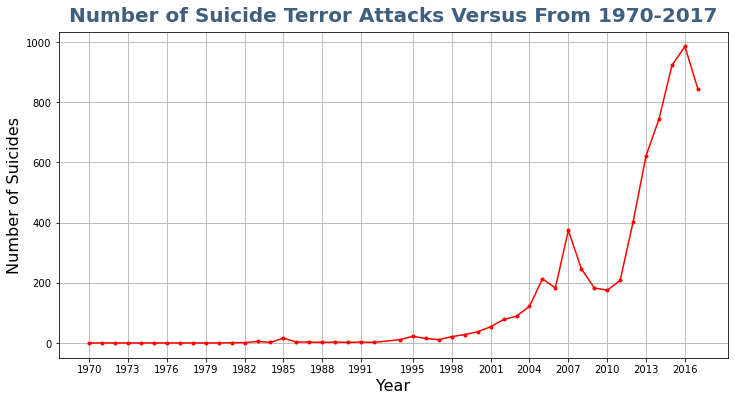

In [32]:
df3_sucd = df3.groupby('Year', as_index = False).Suicide.sum()
#print(df3_sucd.shape)
Year_list = df3_sucd.Year.values.tolist()
#print(Year_list)
Sucd_list = df3_sucd.Suicide.values.tolist()
#print(Sucd_list)
fig, ax6 = plt.subplots(figsize = (12,6))
ax6.plot(Year_list, Sucd_list, 'r', marker = '.')
ax6.set_ylabel('Number of Suicides', size = 16)
ax6.set_xlabel('Year', size = 16)
ax6.grid()

ax6.set_xticks(Year_list[::3])
#ax.set_yticks()
plt.title("Number of Suicide Terror Attacks Versus From 1970-2017", fontsize= 20, pad= 10, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])

### Types of Weapons Used

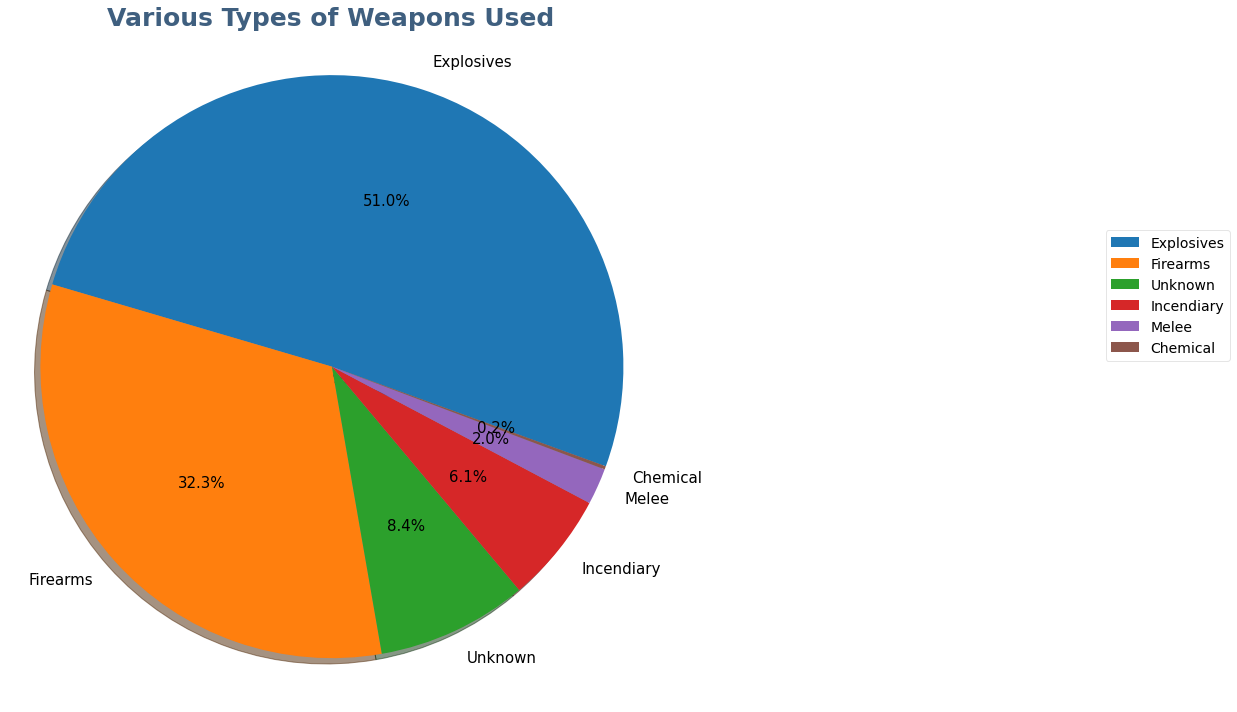

In [33]:
vals_weapon_type = df3.Weapontype.value_counts().tolist()
label_weapons = df3.Weapontype.value_counts().index.tolist()

#labels = [df3.Weapontype.value_counts().index]
#print(labels)

sizes = []

for i in vals_weapon_type[0:6]:
    percent = i*100/len(df3['Weapontype'])
    sizes.append(percent)

# create plots using fig and ax objects from matplotlib
fig3, ax3 = plt.subplots(figsize = (10,10)) # get the figure and axes object
# use ax.pie to plot pie chart which returns 3 parameters
patches, text, autotexts = ax3.pie(sizes, labels = label_weapons[0:6], autopct = '%1.1f%%', 
                                  startangle = -20, shadow = True, colors = sns.color_palette(),
                                 textprops = {'fontsize': 15, 'weight': 'light', 'color': 'k'})
ax3.axis('equal')

plt.title('Various Types of Weapons Used', fontsize= 25, pad= -70, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) #pad change the distance from title to graph
plt.tight_layout()
ax3.legend(loc='lower right',framealpha = 0.5,bbox_to_anchor=(1.8,0.5,0.1,1), prop={'size': 14})

### Casualties Versus Types of Weapon Used

<ipython-input-34-f6d5a9d2a51d>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(list_weapon1, rotation = 90)


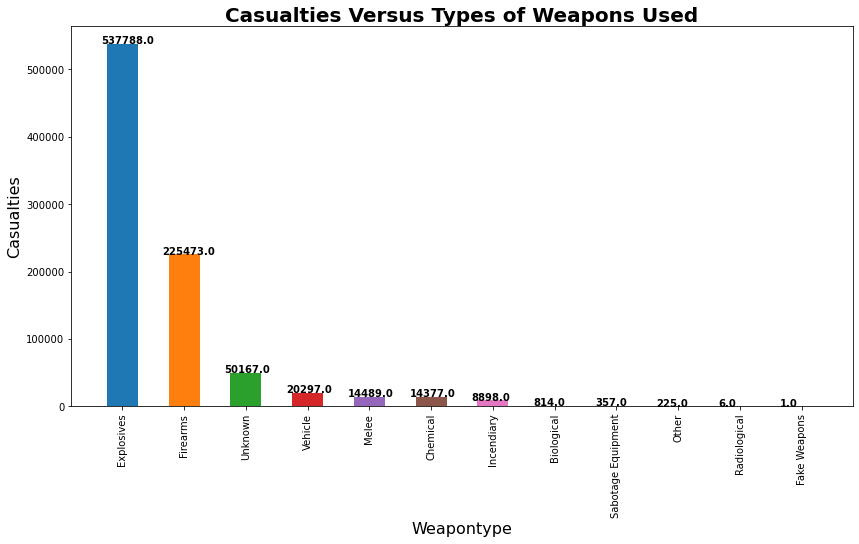

In [34]:
# Used a df3.groupby() to get the 
df3_weap = pd.DataFrame(df3.groupby('Weapontype').Casualties.sum())
df3_weap.reset_index(inplace = True)
df3_weap.sort_values('Casualties', ascending = False, inplace = True)
#df3_weap.head()

# store the values of attack type and casualties in a list
list_weapon = df3_weap['Weapontype'].values.tolist()
list_casualties = df3_weap['Casualties'].values.tolist()
list_weapon1 = ['Explosives', 'Firearms', 'Unknown', 'Vehicle', 'Melee', 'Chemical', 'Incendiary', 'Biological', 
                   'Sabotage Equipment', 'Other', 'Radiological', 'Fake Weapons']

#print(list_cas)
# to make a customized plot we use fig and ax which are returned by plt.subplots

fig, ax1 = plt.subplots(figsize = (14,7))

ax1.bar(list_weapon, list_casualties, color = sns.color_palette(), width = 0.5)

ax1.set_xticklabels(list_weapon1, rotation = 90)

# using plt functions to set title and label

plt.title('Casualties Versus Types of Weapons Used', fontsize= 20, pad= -70, weight ='bold')
plt.xlabel('Weapontype', size = 16)
plt.ylabel('Casualties', size = 16)

#writing a for loop to show the values on the graph
#for i, j in enumerate(list_cas):
    #ax1.text(i-0.3, j-13000 if j==37209 else j+3000, str(round(j)), 
             #color='k',
             #fontweight='bold')
# enumerate returns a tuple of index-value pair
# ax.text(index, value, type)
for i, j in enumerate(list_casualties):
    ax1.text(i-0.35, j, str(j), color='k',fontweight='bold')

### Top Targets Of Terror Attacks

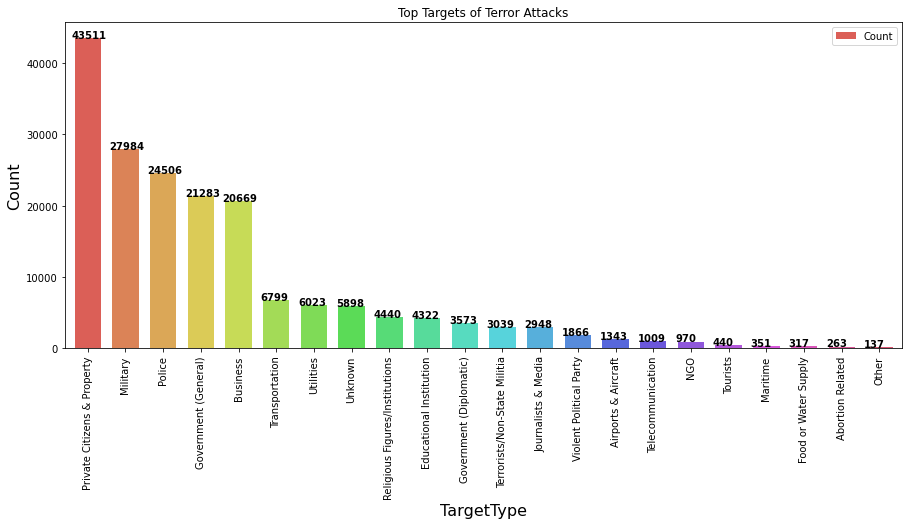

In [35]:
table1 = pd.DataFrame(df3.Targetype.value_counts())
#print(table1)
table1.reset_index(inplace = True)
table1.rename(columns = {'index': 'TargetType', 'Targetype': 'Count'}, inplace = True)
table1.plot(x = 'TargetType', y = 'Count', kind = 'bar', figsize = (15,6), color = sns.color_palette('hls', 22), width = 0.7)

plt.xlabel('TargetType', size = 16)
plt.ylabel('Count', size = 16)
plt.title('Top Targets of Terror Attacks')

list_count = table1.Count.values.tolist()

for i, j in enumerate(list_count):
    plt.gca().text(i-0.42, j, str(j), color='k',fontweight='bold')

### Casualties Versus Different Targets of Terror Attacks

<ipython-input-36-f43104f03b55>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax7.set_xticklabels(labels = list_target_type, rotation = 90)


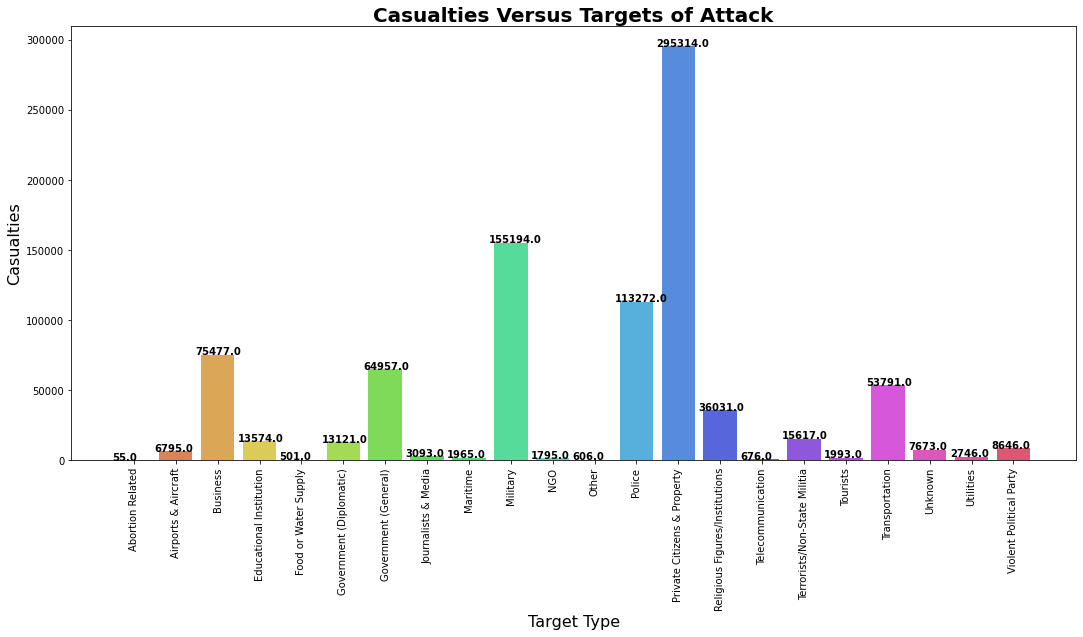

In [36]:
df3_target_cas = pd.DataFrame(df3.groupby('Targetype').Casualties.sum())
df3_target_cas.reset_index(inplace = True)

list_target_type = df3_target_cas.Targetype.values.tolist()
list_target_cas = df3_target_cas.Casualties.values.tolist()

# get the axes and figure of the plot by using plt.subplots()
fig7, ax7 = plt.subplots(figsize = (18, 8))
# use the axes to plot the graph of you choice
ax7.bar(list_target_type, list_target_cas, color = sns.color_palette('hls', 22))
# set the tick labels and labels
ax7.set_xticklabels(labels = list_target_type, rotation = 90)
plt.xlabel('Target Type', size = 16)
plt.ylabel('Casualties', size = 16)
plt.title('Casualties Versus Targets of Attack', fontsize= 20, pad= -70, weight ='bold')

# write the loop to show the values on the plot
for i, j in enumerate(list_target_cas):
    ax7.text(i-0.52, j, str(j), color='k',fontweight='bold')

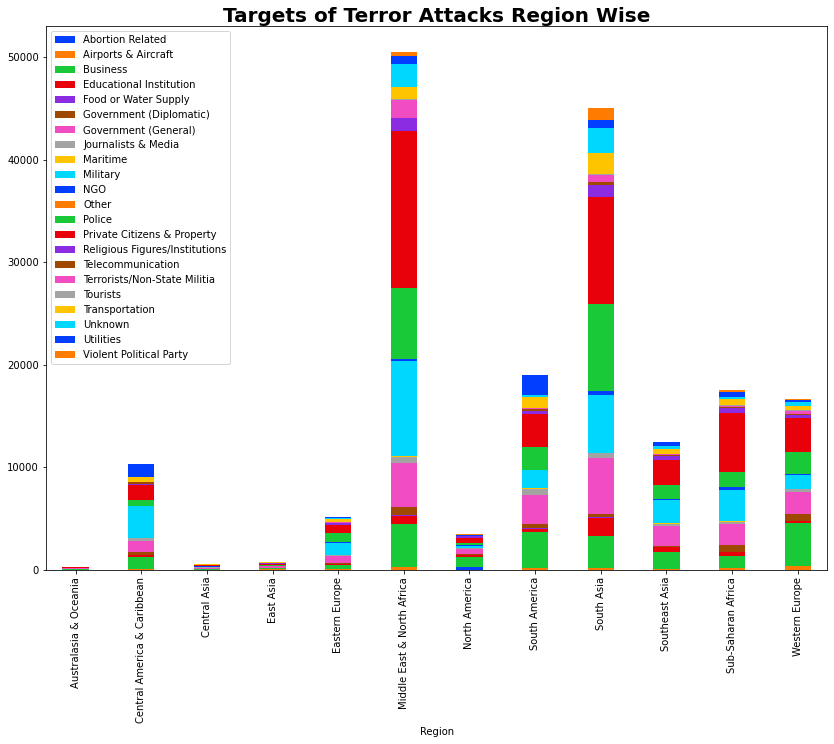

In [37]:
var_type_region = pd.crosstab(df3.Region, df3.Targetype)

var_type_region.plot(kind = 'bar', stacked = True, width = 0.4, 
                     color = sns.color_palette('bright'), 
                     figsize = (14,10))
plt.title('Targets of Terror Attacks Region Wise', fontsize= 20, pad= -70, weight = 'bold')
plt.legend(loc = 'upper left')

### The Terror Groups Behind the Attacks


<ipython-input-38-19902b19a739>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax9.set_yticklabels(terror_grp[1:15],size = 16)


Text(0.5, 0, 'Number of Terrorist Attacks')

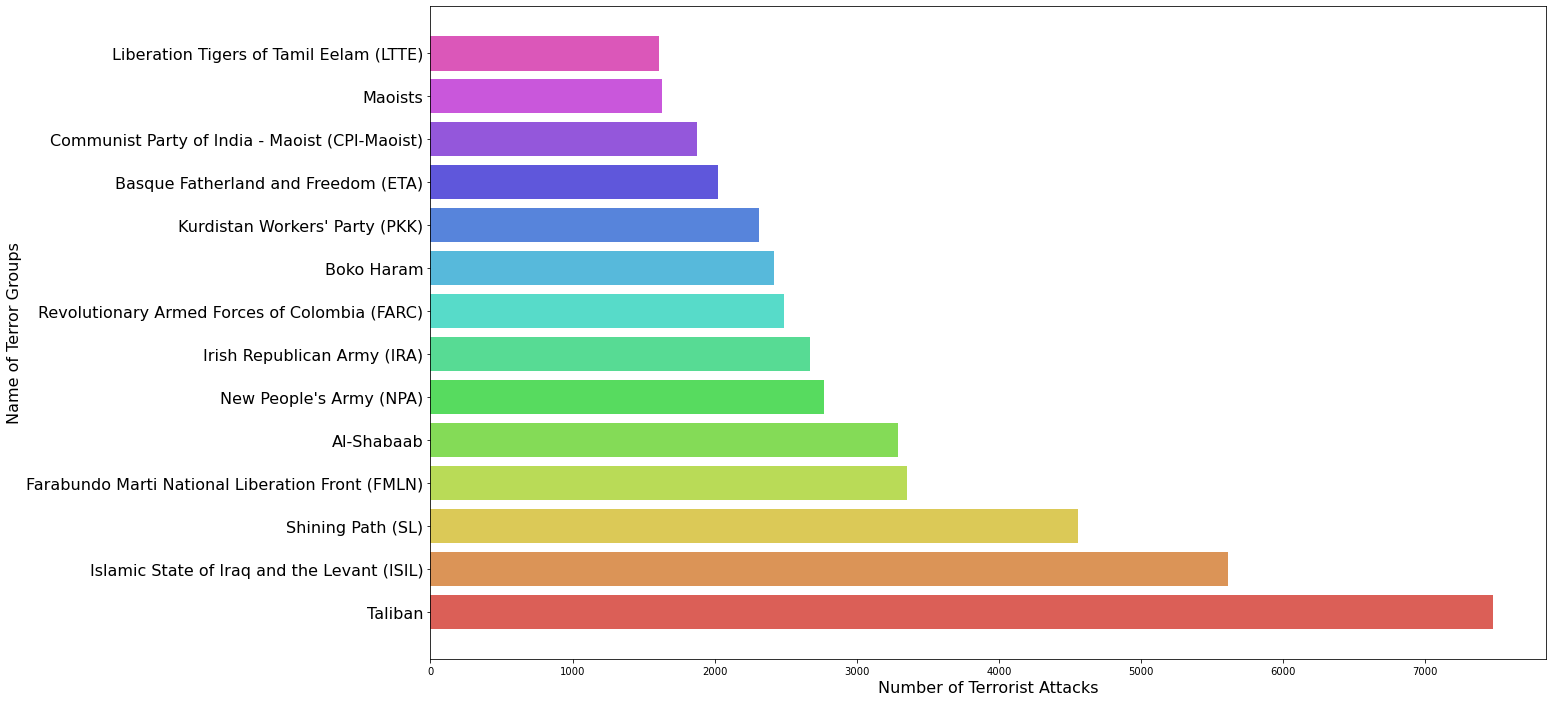

In [38]:
# use the .value_counts method on Gname to get 
# the count of group name with their frequency. This will be a series
table2 = pd.DataFrame(df3.Gname.value_counts())
table2.reset_index(inplace = True)
table2.rename(columns = {'index': 'Terror Group', 'Gname': 'Count'}, inplace = True)

terror_grp = table2['Terror Group'].values.tolist()

count_terror_grp = table2['Count'].values.tolist()


fig, ax9 = plt.subplots(figsize = (20,12))

ax9.barh(terror_grp[1:15], count_terror_grp[1:15], color = sns.color_palette('hls', 15))
ax9.set_yticklabels(terror_grp[1:15],size = 16)
ax9.set_ylabel('Name of Terror Groups', size = 16)
ax9.set_xlabel('Number of Terrorist Attacks', size = 16)

In [64]:
#table2.head()

### Terror Groups Versus Casualties

<ipython-input-63-e3df14bbf907>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax9.set_xticklabels(terror_grp[1:15],size = 12, rotation = 90)


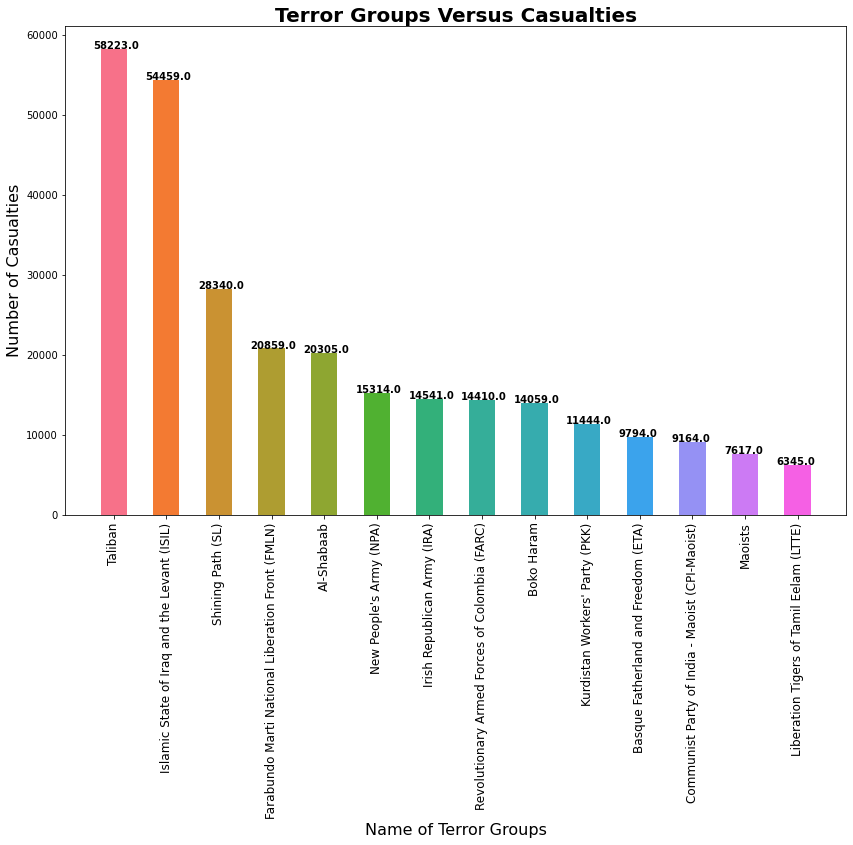

In [63]:
# use the .value_counts method on Gname to get 
# the count of group name with their frequency. This will be a series
table2 = pd.DataFrame(df3.groupby('Gname').Casualties.sum())
table2.reset_index(inplace = True)
table2.rename(columns = {'Gname': 'Terror Group'}, inplace = True)
table2.sort_values(by = 'Casualties', ascending = False, inplace = True)
#print(table2)

#terror_grp = table2['Terror Group'].values.tolist()

count_terror_grp = table2['Casualties'].values.tolist()


fig, ax9 = plt.subplots(figsize = (14,9))

ax9.bar(terror_grp[1:15], count_terror_grp[1:15], color = sns.color_palette('husl', 15), width = 0.5)
ax9.set_xticklabels(terror_grp[1:15],size = 12, rotation = 90)
ax9.set_xlabel('Name of Terror Groups', size = 16)
ax9.set_ylabel('Number of Casualties', size = 16)
plt.title('Terror Groups Versus Casualties', fontsize= 20, pad= -70, weight = 'bold')


for i, j in enumerate(count_terror_grp[1:15]):
    ax9.text(i-0.40, j, str(j), color='k',fontweight='bold')

### Growth of Terror Groups Over the Years 1970-2017

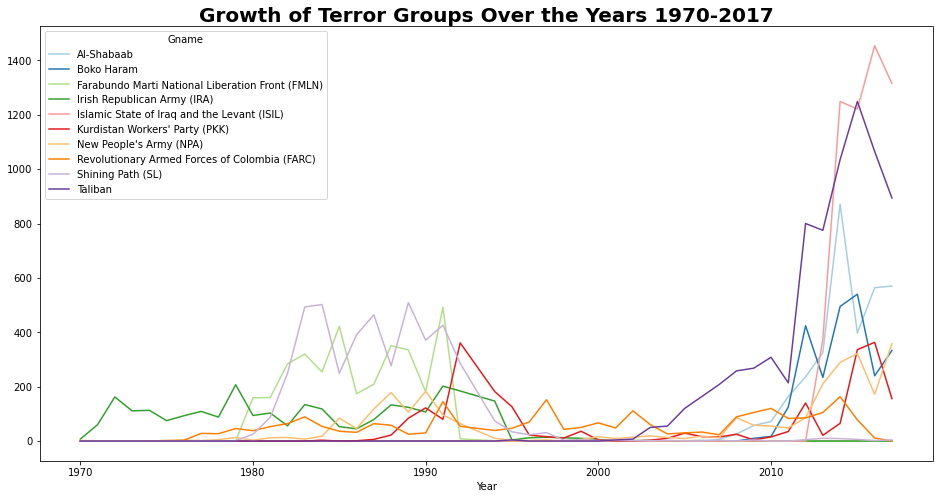

In [62]:
top_groups10 = df3[df3['Gname'].isin(df3['Gname'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year, top_groups10.Gname).plot(color = sns.color_palette('Paired', 10))
fig = plt.gcf()
fig.set_size_inches(16,8)
plt.title('Growth of Terror Groups Over the Years 1970-2017', fontsize= 20, pad= -70, weight = 'bold')

plt.show()

### Most Prominent Terror Groups Across Regions Which Have Caused Atleast 5000 Casualties Or More

In [42]:
table3 = pd.DataFrame(df3.Gname.value_counts())
table3.reset_index(inplace = True)
table3.rename(columns = {'index': 'Terror Groups', 'Gname': 'Count'}, inplace = True)
table3.sort_values(by = 'Count', ascending = False, inplace = True)
#table3

table4 = pd.DataFrame(df3.groupby(['Region', 'Gname']).Casualties.sum())
table4.reset_index(inplace = True)
#table4.dtypes
#table4
table4.shape

(4116, 3)

In [116]:
table4r = table4[table4['Casualties'] > 5000]
#table4r.head()
table4r.sort_values(by = 'Casualties', ascending = False, inplace = True)

<ipython-input-116-c9584c583251>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table4r.sort_values(by = 'Casualties', ascending = False, inplace = True)


Text(0.5, 1.0, 'Terror Groups Across Regions With Atleast 5000 or More Casualties')

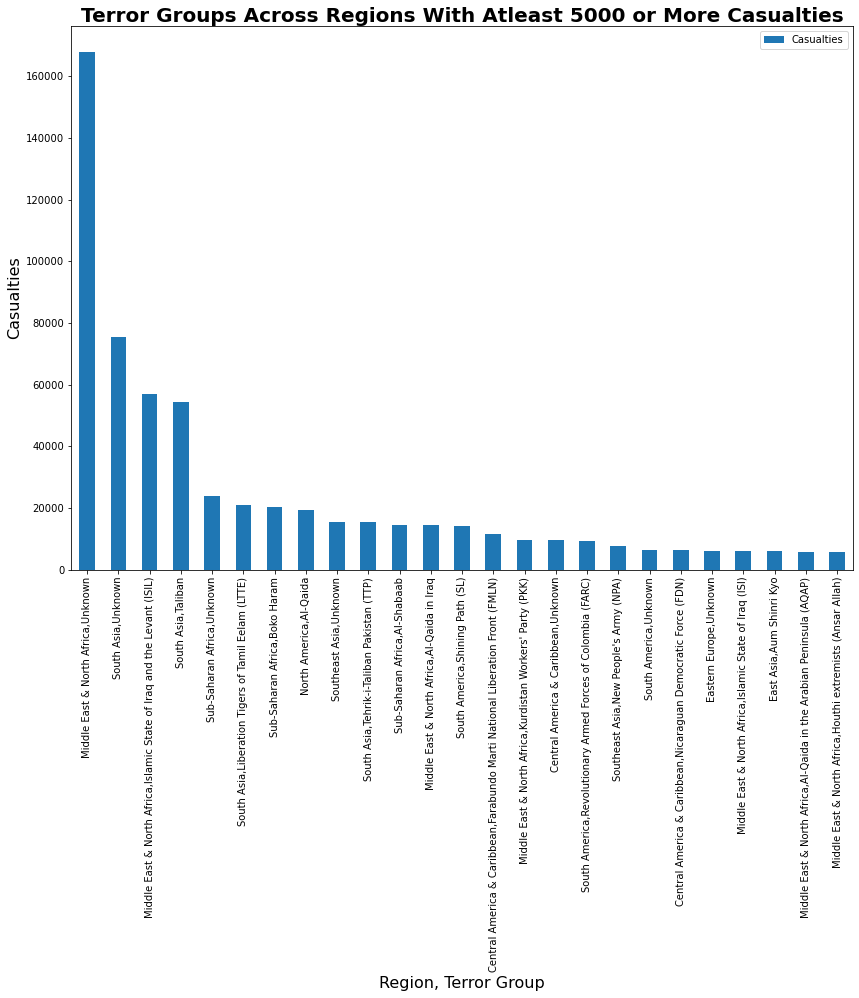

In [139]:
np_labels = table4r.Region.values + ',' + table4r.Gname
np_labels
x = np.arange(0, 25)
table4r.plot(figsize = (14,10), kind = 'bar')
plt.xticks(x, np_labels, rotation = 90)
plt.ylabel('Casualties', size = 16)
plt.xlabel("Region, Terror Group", size = 16)
plt.title('Terror Groups Across Regions With Atleast 5000 or More Casualties', fontsize= 20, pad= -70, weight = 'bold')


## India Centric Terrorism Analysis

### Casualties Versus State/City

Text(0, 0.5, 'Casualties')

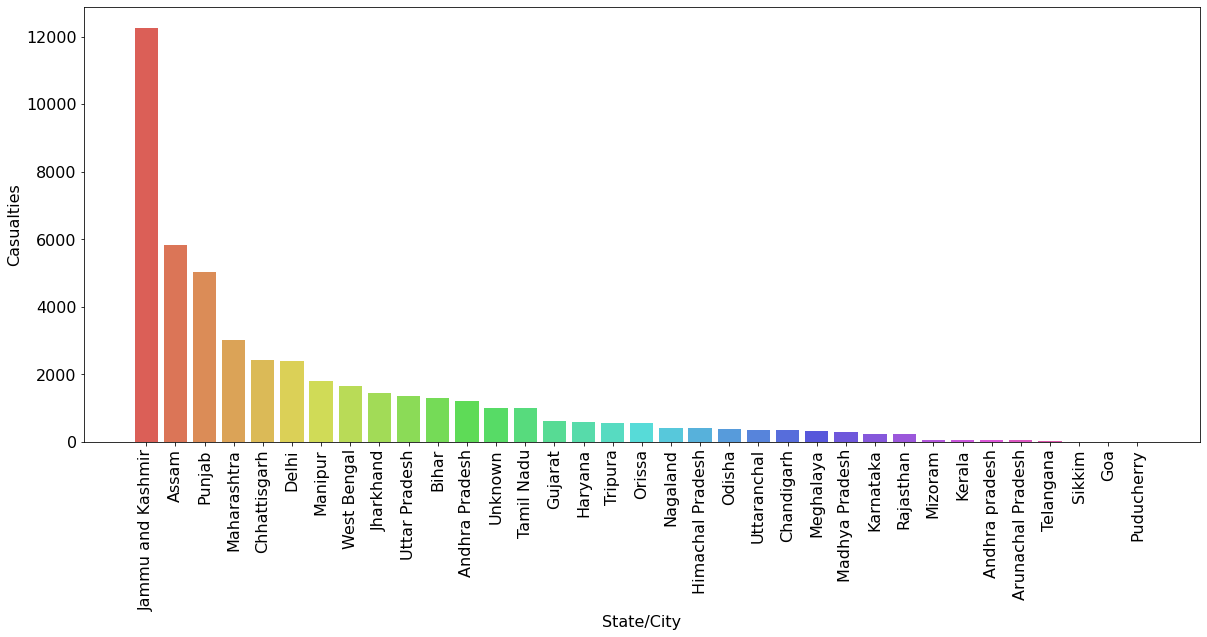

In [167]:
df_India = df3[df3['Country'] == 'India']
#df_India
table5 = pd.DataFrame(df_India.groupby('Provstate').Casualties.sum())
table5.reset_index(inplace = True)
table5.sort_values(by='Casualties', ascending = False, inplace = True)

India_cas_list = table5.Casualties.values.tolist()


plt.figure(figsize = (20,8))
plt.bar(table5.Provstate, table5.Casualties, color = sns.color_palette('hls', 35))
plt.xticks(rotation = 90, fontsize = 16)
plt.yticks(fontsize = 16)

plt.xlabel("State/City", size = 16)
plt.ylabel("Casualties", size = 16)

### Casualties Versus Target Type

Text(0, 0.5, 'Casualties')

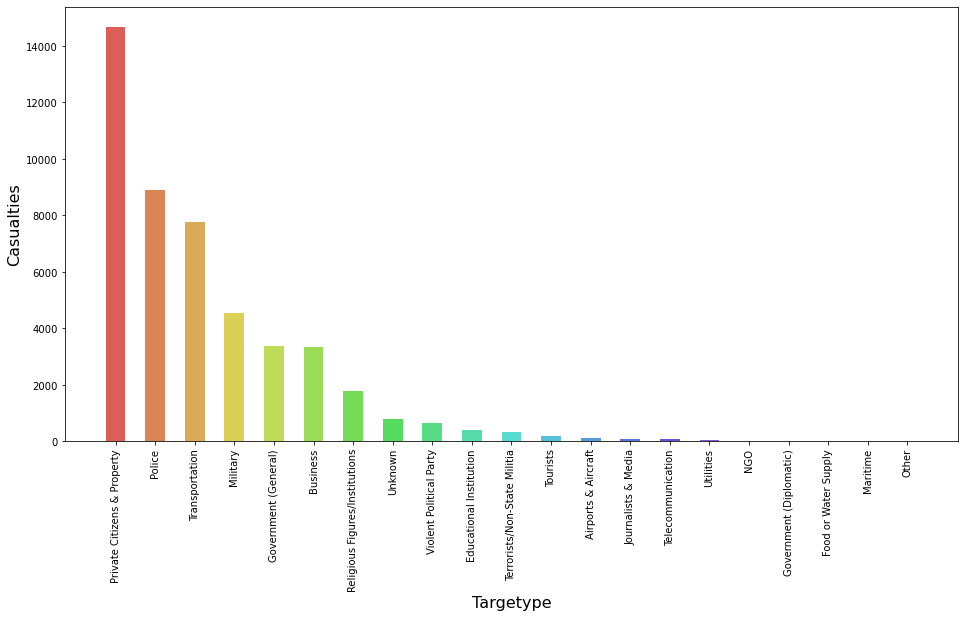

In [137]:
table6 = pd.DataFrame(df_India.groupby('Targetype').Casualties.sum())
table6.reset_index(inplace = True)
table6.sort_values(by = 'Casualties', ascending = False, inplace = True)

plt.figure(figsize = (16,8))
plt.bar(table6.Targetype, table6.Casualties, width = 0.5, color = sns.color_palette('hls', 21))
plt.xticks(rotation = 90)
plt.xlabel("Targetype", size = 16)
plt.ylabel("Casualties", size = 16)

### Casualties Versus Attack Type

Text(0, 0.5, 'Casualties')

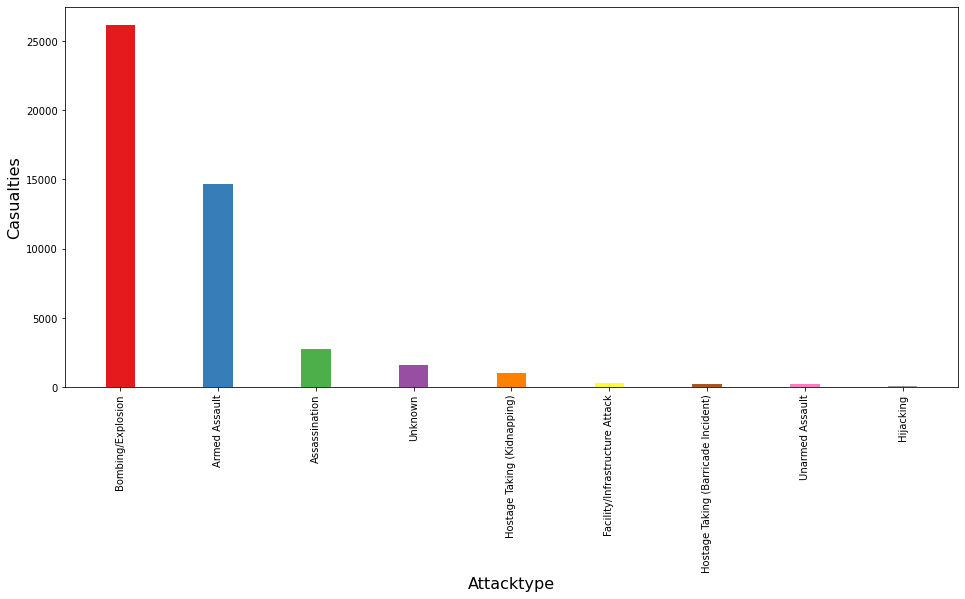

In [152]:
table7 = pd.DataFrame(df_India.groupby('Attacktype').Casualties.sum())
table7.reset_index(inplace = True)
table7.sort_values(by = 'Casualties', ascending = False, inplace = True)

plt.figure(figsize = (16,7))
plt.bar(table7.Attacktype, table7.Casualties, width = 0.3, color = sns.color_palette('Set1', 9))
plt.xticks(rotation = 90)
plt.xlabel("Attacktype", size = 16)
plt.ylabel("Casualties", size = 16)

### Casualties Versus Terror Groups

<ipython-input-166-cb9e6ef85dd7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table8r.sort_values(by = 'Casualties', ascending = False, inplace = True)


Text(0, 0.5, 'Terror Grpup')

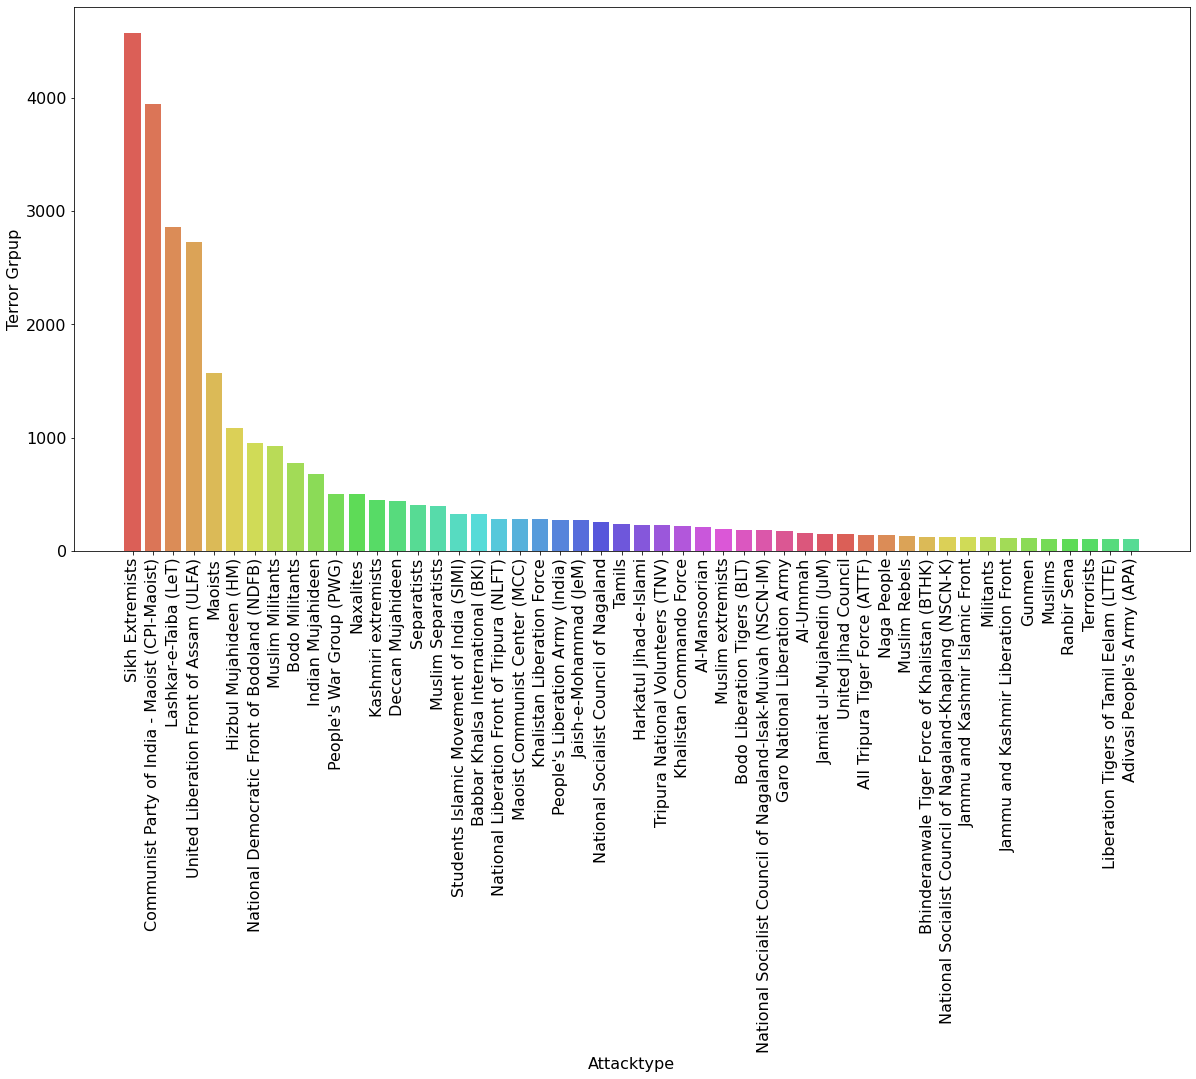

In [166]:
table8 = pd.DataFrame(df_India.groupby('Gname').Casualties.sum())
table8.reset_index(inplace = True)
table8r = table8[table8['Casualties'] > 100]
table8r.sort_values(by = 'Casualties', ascending = False, inplace = True)
plt.figure(figsize =(20,10))
plt.bar(table8r.Gname.iloc[1:], table8r.Casualties.iloc[1:], color = sns.color_palette('hls', 35))
plt.xticks(rotation = 90, fontsize = 16)
plt.yticks(fontsize = 16)

plt.xlabel("Attacktype", size = 16)
plt.ylabel("Terror Grpup", size = 16)

### In this Data Analysis we covered several aspects of the Data and plotted the relationship between the various parameters two at a time and even three at a time. The aim of the analysis was generic in nature and not specific with any goal. The motive was to explain and visualize all the given column in the dataset to get a summary or gist of the data. The scope of analysis also depends a lot on the quality and accuracy of the data. The author does not vouch for the credibility of the data source and has solely done the visualization and analysis. 
### The author is open to changes and additions to improve the analysis/ visualization and encourages others to take up specific case analysis from this point onwards.